In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random
import json

In [ ]:
def researchvis_num_features(df, df_features, color):

    for feat in df_features:

        fig, ax = plt.subplots(2, 1, figsize=(10, 12))
        plt.subplots_adjust(hspace=0.5)
        sns.histplot(ax=ax[0], data=df, x=df[feat], kde=True, bins=100, color=color)

        ax[0].set_ylabel('Частота')
        ax[0].set_title(f'Распределение показателей {df[feat].name}', fontsize=12)

        sns.boxplot(ax=ax[1], data=df, x=df[feat], color=color, medianprops={'color': "darkred", "linewidth": 2})
        ax[1].set_title(f'Диаграмма размаха {df[feat].name}', fontsize = 12)

In [ ]:
def research_vis_cat(df, df_features, palet):

    for feat in df_features:

        fig, ax = plt.subplots(1, 2, figsize=(15, 7))

        sns.countplot(df[feat], palette=palet, ax=ax[0])

        ax[0].set_xlabel(f'{df[feat].name}')
        ax[0].set_ylabel('Количество')
        ax[0].set_title(f'Cтолбчатая диаграмма {df[feat].name}', fontsize=12)

        ax[1].pie(df[feat].value_counts(),
                        labels=df[feat].value_counts().index,
                        autopct='%1.1f%%',
                        startangle=140,
                        colors=sns.color_palette(palet),
                        textprops={'color':'white'})

        ax[1].legend()
        ax[1].set_title(f'Круговая диаграмма {df[feat].name}', fontsize=12)

In [ ]:
def generate_data_corrected_v2(n_samples):
    segments = np.random.choice(["Малый бизнес", "Средний бизнес", "Крупный бизнес"],
                                 size=n_samples,
                                 p=[0.3, 0.2, 0.5])
    roles = np.random.choice(["ЕИО", "Сотрудник"], size=n_samples, p=[0.2, 0.8])

    avg_records_per_client = 25
    n_clients = n_samples // avg_records_per_client
    client_ids = np.repeat([f"client_{i}" for i in range(1, n_clients + 1)], avg_records_per_client)[:n_samples]
    np.random.shuffle(client_ids)


    organizations_per_client = np.random.normal(10, 20, n_clients).clip(1, 300).astype(int)


    organization_ids_per_client = {
        client: [f"org_{client}_{i}" for i in range(1, count + 1)]
        for client, count in zip([f"client_{i}" for i in range(1, n_clients + 1)], organizations_per_client)
    }


    organization_ids = [
        random.choice(organization_ids_per_client[client_id])
        for client_id in client_ids
    ]

    common_signatures_mobile = np.random.normal(10, 5, n_samples).clip(0, 20).astype(int)
    common_signatures_web = np.random.normal(10, 5, n_samples).clip(0, 20).astype(int)
    special_signatures_mobile = np.random.normal(3, 2, n_samples).clip(0, 6).astype(int)
    special_signatures_web = np.random.normal(3, 2, n_samples).clip(0, 6).astype(int)

    current_methods = np.random.choice(["SMS", "PayControl", "КЭП на токене", "КЭП в приложении"],
                                        size=n_samples,
                                        p=[0.9, 0.033, 0.033, 0.034])
    claims = np.where(current_methods == "SMS", np.random.randint(0, 6, size=n_samples), 0)


    mobile_apps = np.random.choice([True, False], size=n_samples, p=[0.9, 0.1])


    df = pd.DataFrame({
        "clientId": client_ids,
        "organizationId": organization_ids,
        "segment": segments,
        "role": roles,
        "currentMethod": current_methods,
        "common_signatures_mobile": common_signatures_mobile,
        "common_signatures_web": common_signatures_web,
        "special_signatures_mobile": special_signatures_mobile,
        "special_signatures_web": special_signatures_web,
        "claims": claims,
        "mobileApp": mobile_apps,
    })


    client_organizations = df.groupby("clientId")["organizationId"].nunique()
    df["organizations"] = df["clientId"].map(client_organizations)

    # Генерация доступных методов
    available_methods = []
    for _ in range(n_samples):
        choice = np.random.random()
        if choice < 0.87:
            # SMS доступен
            available_methods.append(["SMS"])
        elif choice < 0.95:
            # Комбинация из двух методов
            available_methods.append(random.sample(["SMS", "PayControl", "КЭП на токене", "КЭП в приложении"], 2))
        elif choice < 0.98:
            # Один метод (не SMS)
            available_methods.append([random.choice(["PayControl", "КЭП на токене", "КЭП в приложении"])])
        else:
            # Ни одного метода
            available_methods.append([])

    df["availableMethods"] = ["; ".join(methods) for methods in available_methods]

    # Генерация целевого признака
 #   df["target"] = np.random.choice(["SMS", "PayControl", "КЭП на токене", "КЭП в приложении"], size=n_samples)

    return df

# Генерация данных
n_samples = 10000
csv_data = generate_data_corrected_v2(n_samples)

In [ ]:
import os
os.listdir()
from google.colab import drive
drive.mount('/content/drive')

df = pd.DataFrame(csv_data)
csv_path = 'drive/MyDrive/Colab Notebooks/datasets_alfa/data_final.csv'
df.to_csv(csv_path, index=False, encoding="utf-8")

csv_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'drive/MyDrive/Colab Notebooks/datasets_alfa/data_final.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   clientId                   10000 non-null  object
 1   organizationId             10000 non-null  object
 2   segment                    10000 non-null  object
 3   role                       10000 non-null  object
 4   currentMethod              10000 non-null  object
 5   common_signatures_mobile   10000 non-null  int64 
 6   common_signatures_web      10000 non-null  int64 
 7   special_signatures_mobile  10000 non-null  int64 
 8   special_signatures_web     10000 non-null  int64 
 9   claims                     10000 non-null  int64 
 10  mobileApp                  10000 non-null  bool  
 11  organizations              10000 non-null  int64 
 12  availableMethods           10000 non-null  object
dtypes: bool(1), int64(6), object(6)
memory usage: 947.4+ KB


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['clientId', 'organizationId', 'segment', 'role', 'currentMethod',
       'availableMethods'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include=['int64']).columns
num_cols

Index(['common_signatures_mobile', 'common_signatures_web',
       'special_signatures_mobile', 'special_signatures_web', 'claims',
       'organizations'],
      dtype='object')

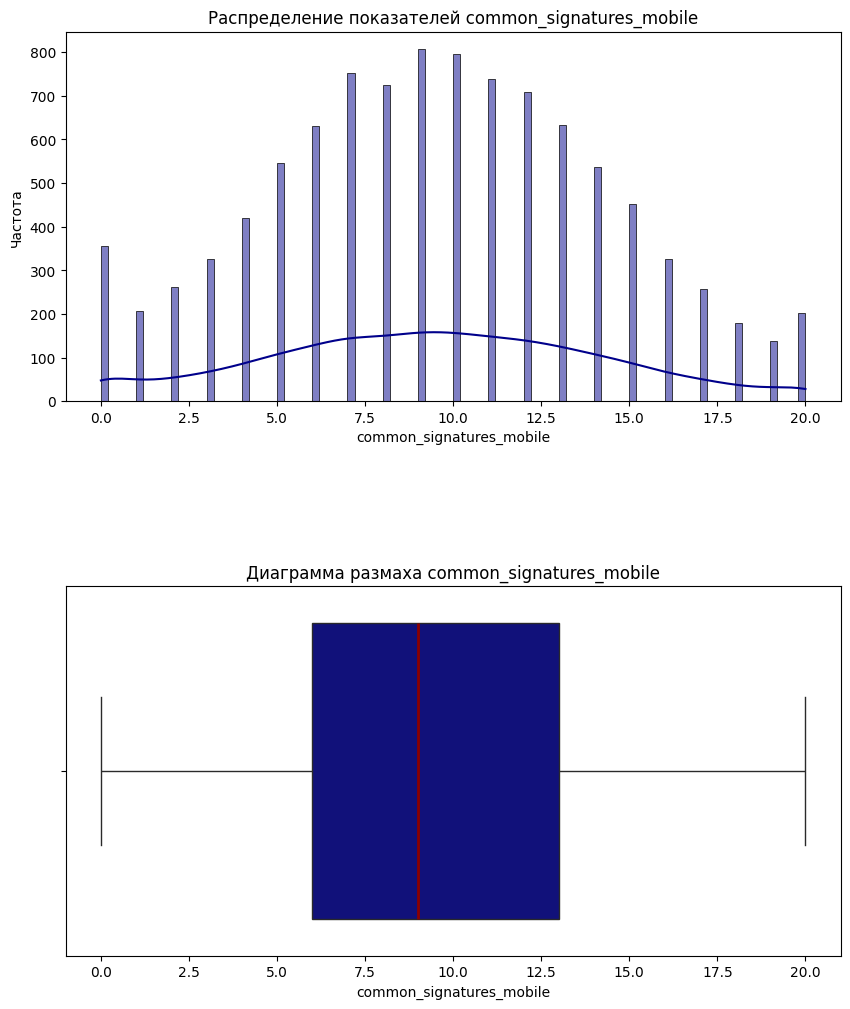

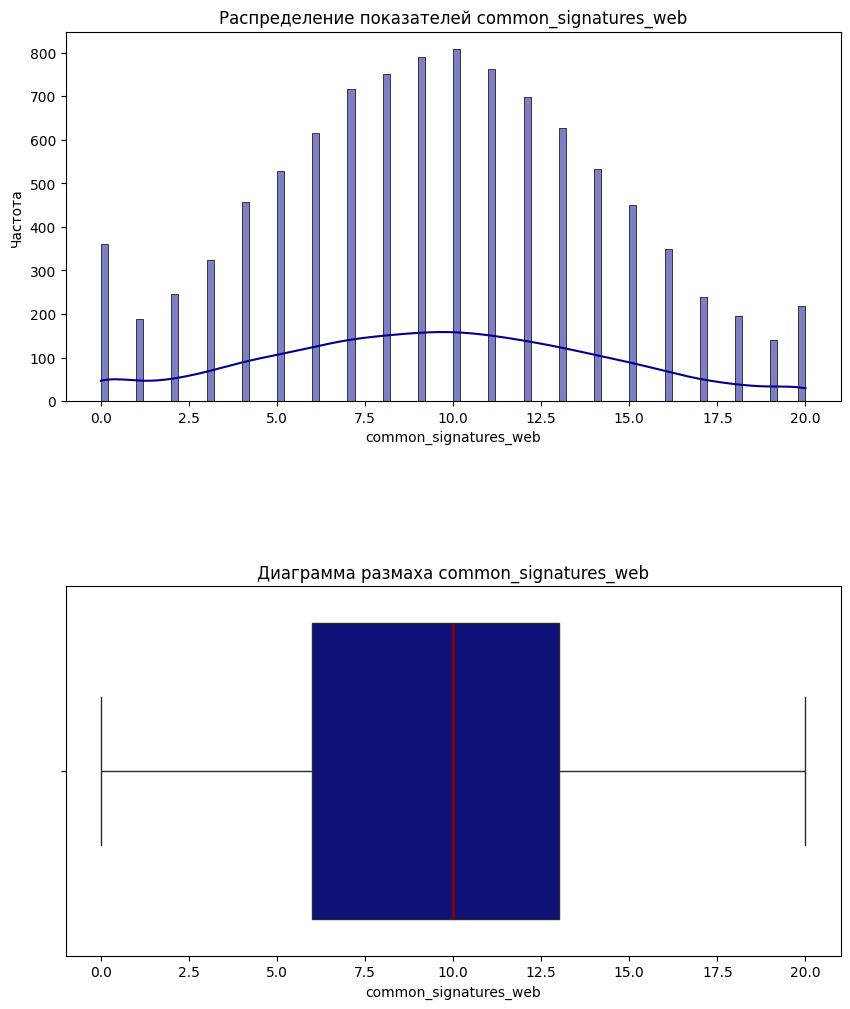

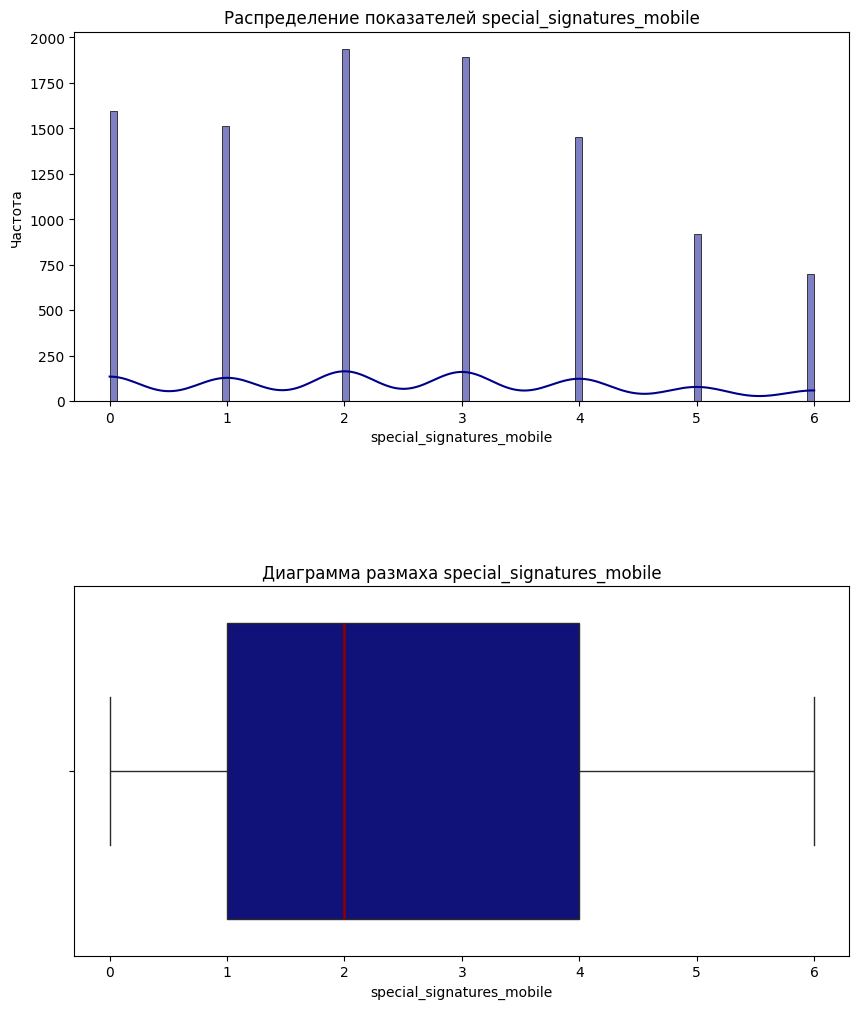

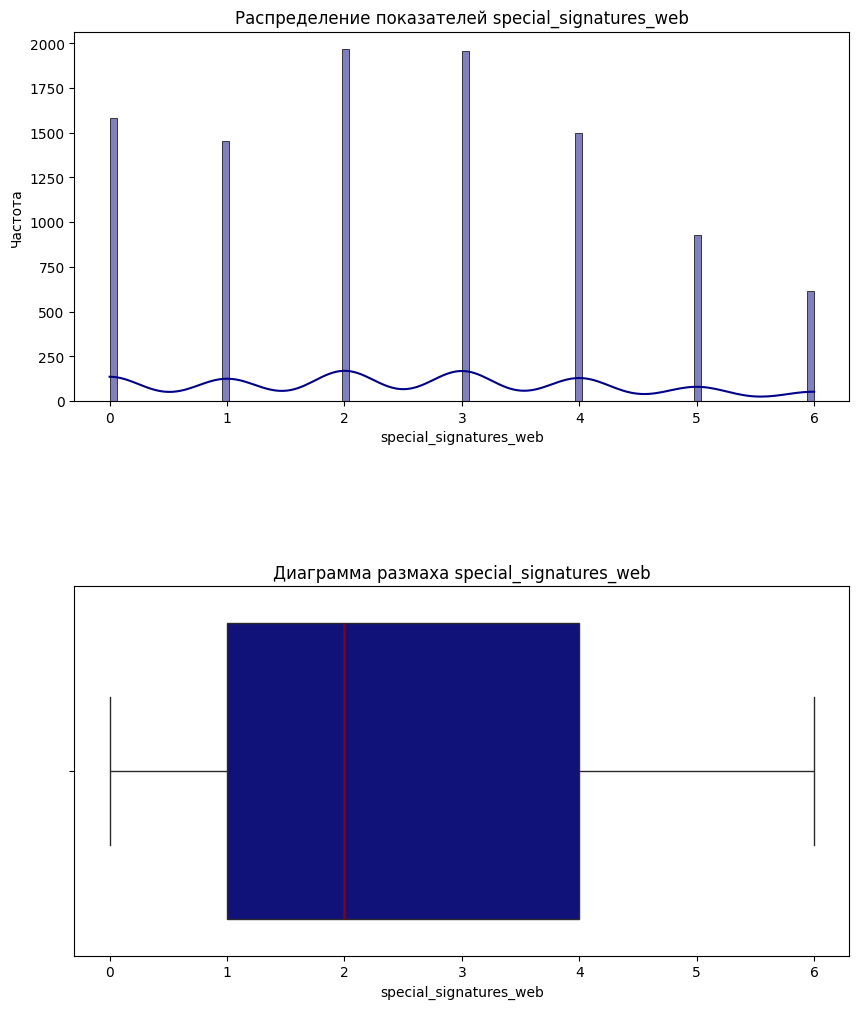

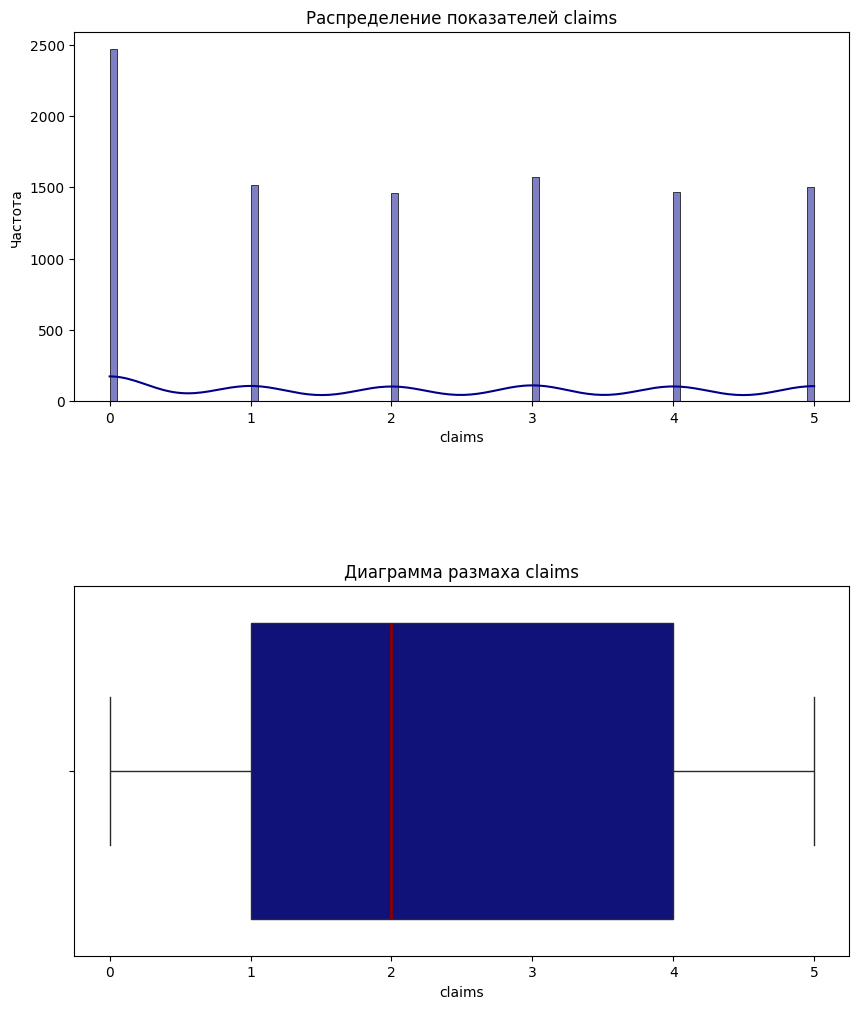

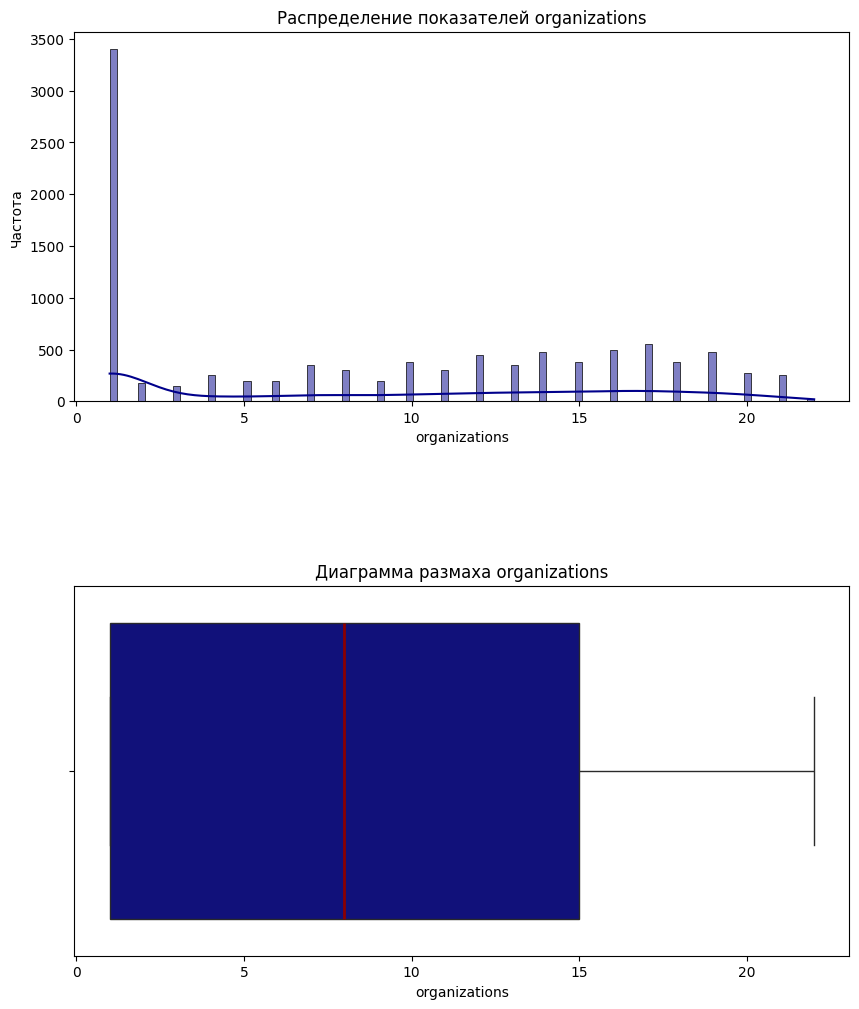

In [ ]:
researchvis_num_features(df, num_cols, 'darkblue')

In [ ]:
#research_vis_cat(df, cat_cols, "Spectral")

In [ ]:
df['clientId'].nunique()

400

In [ ]:
df['organizationId'].nunique()

3510

In [ ]:
df.head()

,clientId,organizationId,segment,role,currentMethod,common_signatures_mobile,common_signatures_web,special_signatures_mobile,special_signatures_web,claims,mobileApp,organizations,availableMethods
0,client_305,org_client_305_1,Крупный бизнес,Сотрудник,SMS,10,11,5,5,1,True,1,SMS
1,client_262,org_client_262_8,Крупный бизнес,Сотрудник,SMS,5,12,3,3,3,True,8,SMS
2,client_367,org_client_367_11,Крупный бизнес,Сотрудник,SMS,16,13,5,0,0,True,12,SMS
3,client_161,org_client_161_1,Малый бизнес,Сотрудник,SMS,9,16,3,3,2,True,1,SMS
4,client_239,org_client_239_9,Средний бизнес,ЕИО,КЭП в приложении,0,12,2,2,0,True,13,SMS


In [ ]:
json_path = 'drive/MyDrive/Colab Notebooks/datasets_alfa/dataset.csv'

df.to_json(json_path, orient="records", lines=True, force_ascii=False)

from google.colab import drive
drive.mount('/content/drive')

google_drive_path = 'drive/MyDrive/Colab Notebooks/datasets_alfa/dataset_final.json'

import shutil
shutil.copy(json_path, google_drive_path)

print(f"JSON файл сохранен на Google Диске по пути: {google_drive_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
JSON файл сохранен на Google Диске по пути: drive/MyDrive/Colab Notebooks/datasets_alfa/dataset_final.json
